In [1]:
from pathlib import Path
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append('..')

import training

In [2]:
df_all = pd.read_csv('../reports/benchmark_all_windows/results.csv')

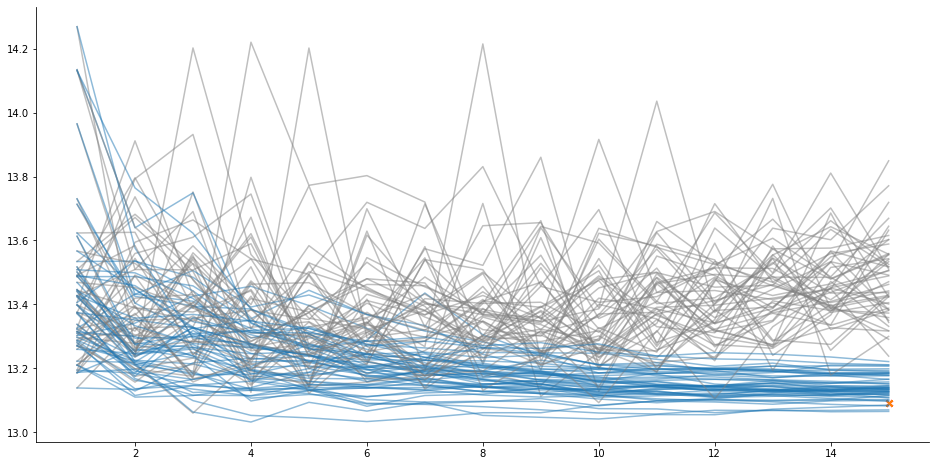

In [3]:
emax = int(df_all['epoch'].max())

plt.figure(figsize=(16, 8))

ax = plt.subplot(111)
for n in sorted(df_all['num'].unique()):
    if not n >= 0:
        continue
    tmp = df_all[df_all['num'] == n]
    base = tmp[~tmp['ensemble']].dropna()
    ax.plot(range(1, emax+1), base['smape'], c='0.5', alpha=0.5)
    ens = tmp[tmp['ensemble']].dropna()
    ax.plot(range(1, emax+1), ens['smape'], c='C0', alpha=0.5)
    ax.scatter([emax], list(df_all[(df_all['epoch'].isna()) & (df_all['num'].isna())]['smape']), c='C1', marker='x')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

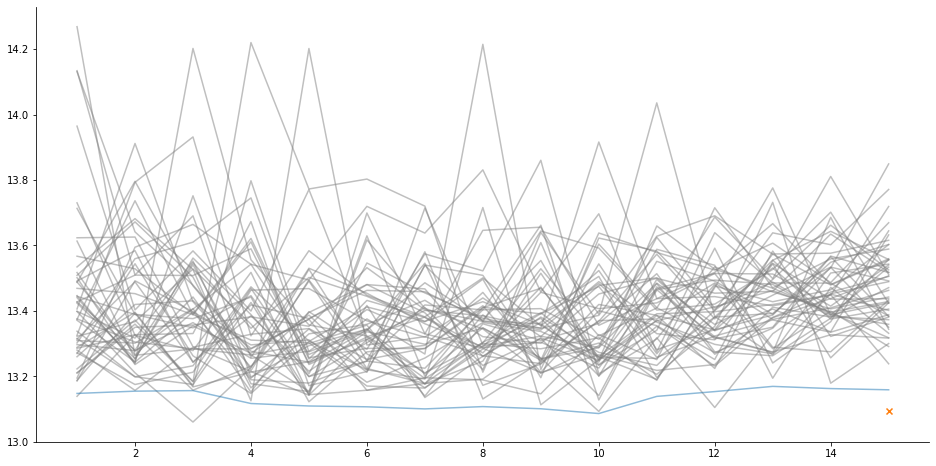

In [4]:
plt.figure(figsize=(16, 8))

ax = plt.subplot(111)
for n in sorted(df_all['num'].unique()):
    if not n >= 0:
        continue
    tmp = df_all[df_all['num'] == n]
    base = tmp[~tmp['ensemble']].dropna()
    ax.plot(range(1, emax+1), base['smape'], c='0.5', alpha=0.5)    
    
ens = df_all[df_all['num'].isna() & df_all['epoch'].notna()]

ax.plot(range(1, emax+1), ens['smape'], c='C0', alpha=0.5)
ax.scatter([emax], list(df_all[df_all['num'] < 0]['smape']), c='C1', marker='x')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

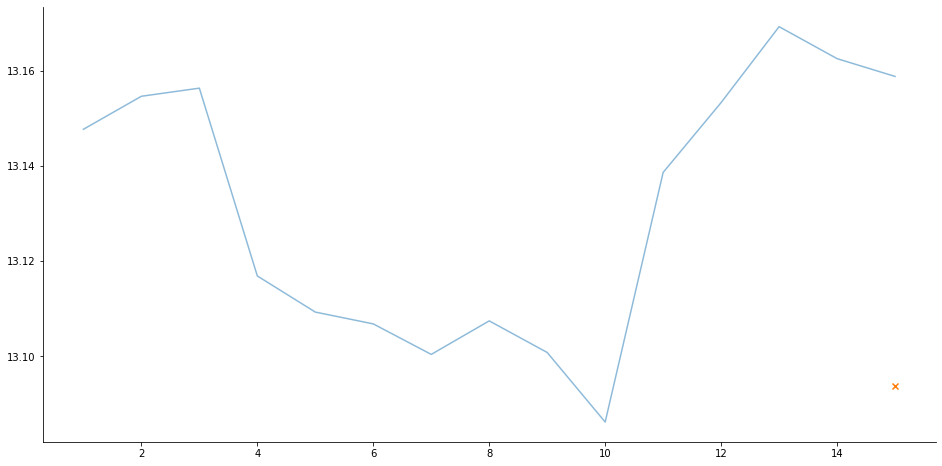

In [5]:
plt.figure(figsize=(16, 8))

ax = plt.subplot(111)
ax.plot(range(1, emax+1), ens['smape'], c='C0', alpha=0.5)
ax.scatter([emax], list(df_all[df_all['num'] < 0]['smape']), c='C1', marker='x')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [6]:
df_all[df_all.isna().any(axis=1)]

,input_len,num,epoch,ensemble,smape,mase*
1500,18,NaN,0.0,True,13.147685,2.685436
1501,18,NaN,1.0,True,13.154621,2.681525
1502,18,NaN,2.0,True,13.156326,2.683094
1503,18,NaN,3.0,True,13.116876,2.676054
1504,18,NaN,4.0,True,13.109288,2.673910
1505,18,NaN,5.0,True,13.106805,2.671278
1506,18,NaN,6.0,True,13.100396,2.670601
1507,18,NaN,7.0,True,13.107439,2.680015
1508,18,NaN,8.0,True,13.100802,2.668437
1509,18,NaN,9.0,True,13.086191,2.665614


Find decent individual model

In [10]:
df_all[~df_all['ensemble']].sort_values('smape')

,input_len,num,epoch,ensemble,smape,mase*
1234,18,41.0,3.0,False,13.060254,2.633353
1278,18,42.0,10.0,False,13.092712,2.647281
1282,18,42.0,12.0,False,13.104668,2.640572
436,18,14.0,9.0,False,13.112863,2.643512
878,18,29.0,5.0,False,13.122292,2.647615
...,...,...,...,...,...,...
38,18,1.0,5.0,False,14.201902,2.870377
64,18,2.0,3.0,False,14.202126,2.938765
974,18,32.0,8.0,False,14.214674,2.811304
306,18,10.0,4.0,False,14.220077,2.961173


In [19]:
ls ../results/benchmark_all_windows/inp_18__41/weights_epoch_012.h5

../results/benchmark_all_windows/inp_18__41/weights_epoch_012.h5
